# Bonus: Temperature Analysis I

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import select
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt

In [18]:
# "tobs" is "temperature observations"
df = pd.read_csv('./Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [19]:
# Convert the date column format from string to datetime
df['date']=[dt.strptime(date, "%Y-%m-%d") for date in df['date']]




In [20]:
# Set the date column as the DataFrame index
df.set_index('date', inplace=True)
df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [21]:
# Drop the date column
df2=df.reset_index(drop=True, inplace=False)
df2.head()

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73


### Compare June and December data across all years 

In [22]:
from scipy import stats


In [23]:
# Filter data for desired months
df.reset_index()
df = df[np.in1d(df.index.month, [6,12])]
df.reset_index()

,date,station,prcp,tobs
0,2010-06-01,USC00519397,0.00,78
1,2010-06-02,USC00519397,0.01,76
2,2010-06-03,USC00519397,0.00,78
3,2010-06-04,USC00519397,0.00,76
4,2010-06-05,USC00519397,0.00,77
...,...,...,...,...
3212,2017-06-26,USC00516128,0.02,79
3213,2017-06-27,USC00516128,0.10,74
3214,2017-06-28,USC00516128,0.02,74
3215,2017-06-29,USC00516128,0.04,76


In [24]:
# Identify the average temperature for June
June= df[np.in1d(df.index.month, [6])]
June.reset_index()
June=June.groupby('station')['tobs'].mean()
June2=June.reset_index()
June_tobs=June2['tobs']
June_tobs

0    74.139394
1    74.050847
2    76.005376
3    71.937220
4    76.655405
5    73.394737
6    73.271186
7    77.559322
8    76.668103
Name: tobs, dtype: float64

In [25]:
# Identify the average temperature for December
# Create collections of temperature data
Dec= df[np.in1d(df.index.month, [12])]
Dec.reset_index()
Dec=Dec.groupby('station')['tobs'].mean()
Dec2=Dec.reset_index()
Dec_tobs=Dec2['tobs']
Dec_tobs

0    69.684211
1    71.069444
2    73.224719
3    69.291262
4    71.834862
5    72.421053
6    69.903226
7    71.109524
8    72.433333
Name: tobs, dtype: float64

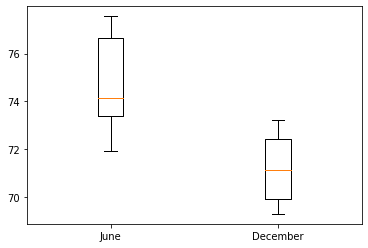

In [26]:
# Run paired t-test
stats.ttest_ind(June_tobs,Dec_tobs, equal_var=False)
hawaii = [June2["tobs"],Dec2["tobs"]]
plt.boxplot(hawaii,labels=['June', 'December']);

### Analysis

In [ ]:
This p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis. As you can see in the box plots, there is more variances from the mean in June with higher temps, over a more conistent temps in December.